In [ ]:
### Обзор 1
Этот Jupyter ноутбук посвящён анализу и предобработке данных о продаже домов для обучения модели машинного обучения с целью предсказания цен на дома. Общие шаги включают:
- Изучение структуры датасета, признаков и распределений.
- Обработка пропущенных значений и выполнение необходимых преобразований данных.
- Использование визуализации данных для изучения корреляций и взаимосвязей между признаками.

# Проект: Прогнозирование стоимости недвижимости

**Клиент:** Крупное агентство недвижимости  

**Проблема:**  
Риелторы агентства тратят слишком много времени на сортировку объявлений и поиск выгодных предложений. Это замедляет скорость реакции на рынок и снижает качество анализа по сравнению с конкурентами, что негативно влияет на финансовые показатели компании.  

**Цель проекта:**  
Разработать сервис для прогнозирования стоимости домов на основе истории предложений, который позволит:  
- ускорить процесс анализа объявлений;  
- повысить точность оценки недвижимости;  
- обойти конкурентов по скорости и качеству совершения сделок.  

**Данные для работы:**  
Клиент предоставил датасет с историей предложений по недвижимости, который будет использоваться для обучения модели.  

**Задачи проекта:**  
1. Провести анализ и очистку данных;  
2. Построить модель машинного обучения для предсказания стоимости домов;  
3. Разработать сервис для оперативного использования модели агентами недвижимости.  


# Описание признаков (Features) датасета

| Признак | Перевод / Описание |
|---------|------------------|
| `status` | Статус недвижимости |
| `private pool` | Частный бассейн |
| `PrivatePool` | Частный бассейн (дублируется, вариант с заглавной буквы) |
| `propertyType` | Тип недвижимости |
| `street` | Улица |
| `baths` | Ванные комнаты |
| `homeFacts` | Характеристики дома / сведения о доме |
| `fireplace` | Камин |
| `city` | Город |
| `schools` | Школы рядом |
| `sqft` | Площадь (в квадратных футах) |
| `zipcode` | Почтовый индекс |
| `beds` | Количество спален |
| `state` | Штат / регион |
| `stories` | Этажей |
| `mls-id` | Идентификатор MLS (системы недвижимости) |
| `MlsId` | Идентификатор MLS (дублируется, вариант с заглавной буквы) |
| `target` | Целевая переменная / предсказываемый параметр (например, цена) |


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge

import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
RANDOM_SEED = 42

In [2]:
# Чтение CSV
df = pd.read_csv('data.csv')
print("Размер данных:", df.shape)
df.head()

Размер данных: (377185, 18)


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [3]:
# 3. Проверка типов и пропусков

df.info()
df.isna().sum().sort_values(ascending=False).head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

private pool    373004
mls-id          352243
PrivatePool     336874
fireplace       274071
stories         150716
baths           106338
beds             91282
MlsId            66880
sqft             40577
status           39918
propertyType     34733
target            2481
city                34
street               2
schools              0
dtype: int64

Сейчас “сырая” таблица, в которой все признаки типа object, даже те, которые должны быть числовыми (sqft, baths, beds, stories, target)
На основе названий нужно определить, какие признаки должны быть числовыми:
пробуем привести их к числовому типу (после очистки от текстовых символов, например, запятых или единиц измерения)

In [4]:
df.describe( include=('all'))

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


In [5]:
print('number of duplicates:',df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

number of duplicates: 50


(377135, 18)

In [7]:
# Identify Numerical and Categorical Features

#numerical_columns = df.select_dtypes(include=['number']).columns
#numerical_variables = numerical_columns.tolist()
#print("Numerical Features Count:", len(numerical_variables))
#print("Numerical Features:", numerical_variables)

#categorical_columns = df.select_dtypes(include=['object']).columns
#Wcategorical_variables = categorical_columns.tolist()
#print("Categorical Features Count:", len(categorical_variables))
#print("Categorical Features:", categorical_variables)

In [6]:
df['target'].value_counts()

target
$225,000    1462
$275,000    1355
$250,000    1312
$350,000    1296
$299,900    1276
            ... 
$307,327       1
$170,591       1
$251,600       1
$489,887       1
$675,346       1
Name: count, Length: 43939, dtype: int64

In [7]:
# Удаляем знак $ и запятые, затем преобразуем в float
# Преобразуем всё в строки (на случай, если часть значений не строки)
df['target'] = df['target'].astype(str)

# Удаляем символы $ и запятые
df['target'] = df['target'].str.replace('[\$,]', '', regex=True)

# Преобразуем в числовой тип (float)
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Проверим
print(df['target'].head())
print(df['target'].dtype)


0     418000.0
1     310000.0
2    2895000.0
3    2395000.0
4       5000.0
Name: target, dtype: float64
float64


### Аннализ целевой переменной target
- Столбец target - это наша целевая переменная y. Переменная y - это значение, которое мы будет стараться предсказать.
- Первый шаг EDA - проверка распределения y! Построим гистограмму целевой функции.

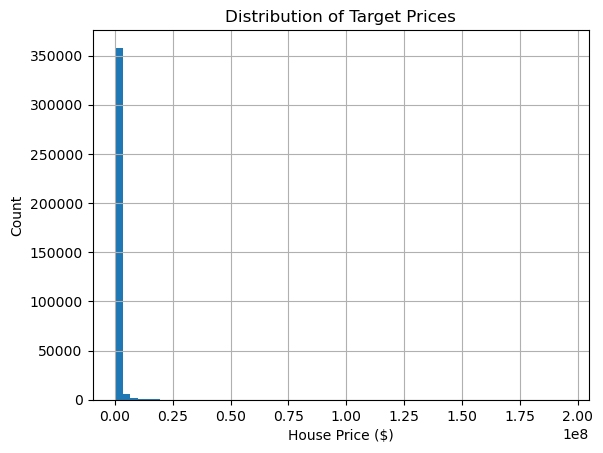

In [8]:
#построим гистограмму
import matplotlib.pyplot as plt

df['target'].dropna().hist(bins=60)
plt.xlabel('House Price ($)')
plt.ylabel('Count')
plt.title('Distribution of Target Prices')
plt.show()



In [ ]:
Постмотрев на график можно сразу же отметить, что распределение имеет очень длинный хвост справа.
И график по сути нечитаем, поскольку большая часть обьектов недвижимости продаеться по цене в диапазоне от нуля до миллион доллларов.

#### Посмотрим на распределения остальных признаков.

In [9]:
# Список числовых признаков
numeric_cols = ['sqft', 'baths', 'beds', 'stories']

# Очистка и преобразование
for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)                          # приводим к строке
        .str.replace(',', '', regex=False)    # убираем запятые
        .str.extract(r'(\d+\.?\d*)')[0]       # извлекаем число (например, "2.5")
        .astype(float)                        # приводим к float
    )

# Проверим результат
print(df[numeric_cols].head())
print("\nТипы данных после преобразования:\n")
print(df[numeric_cols].dtypes)


     sqft  baths  beds  stories
0  2900.0    3.5   4.0      NaN
1  1947.0    3.0   3.0      2.0
2  3000.0    2.0   3.0      1.0
3  6457.0    8.0   5.0      3.0
4     NaN    NaN   NaN      NaN

Типы данных после преобразования:

sqft       float64
baths      float64
beds       float64
stories    float64
dtype: object


In [10]:
#Теперь разделим признаки по типам
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['baths', 'sqft', 'beds', 'stories', 'target']
Categorical columns: ['status', 'private pool', 'propertyType', 'street', 'homeFacts', 'fireplace', 'city', 'schools', 'zipcode', 'state', 'mls-id', 'PrivatePool', 'MlsId']


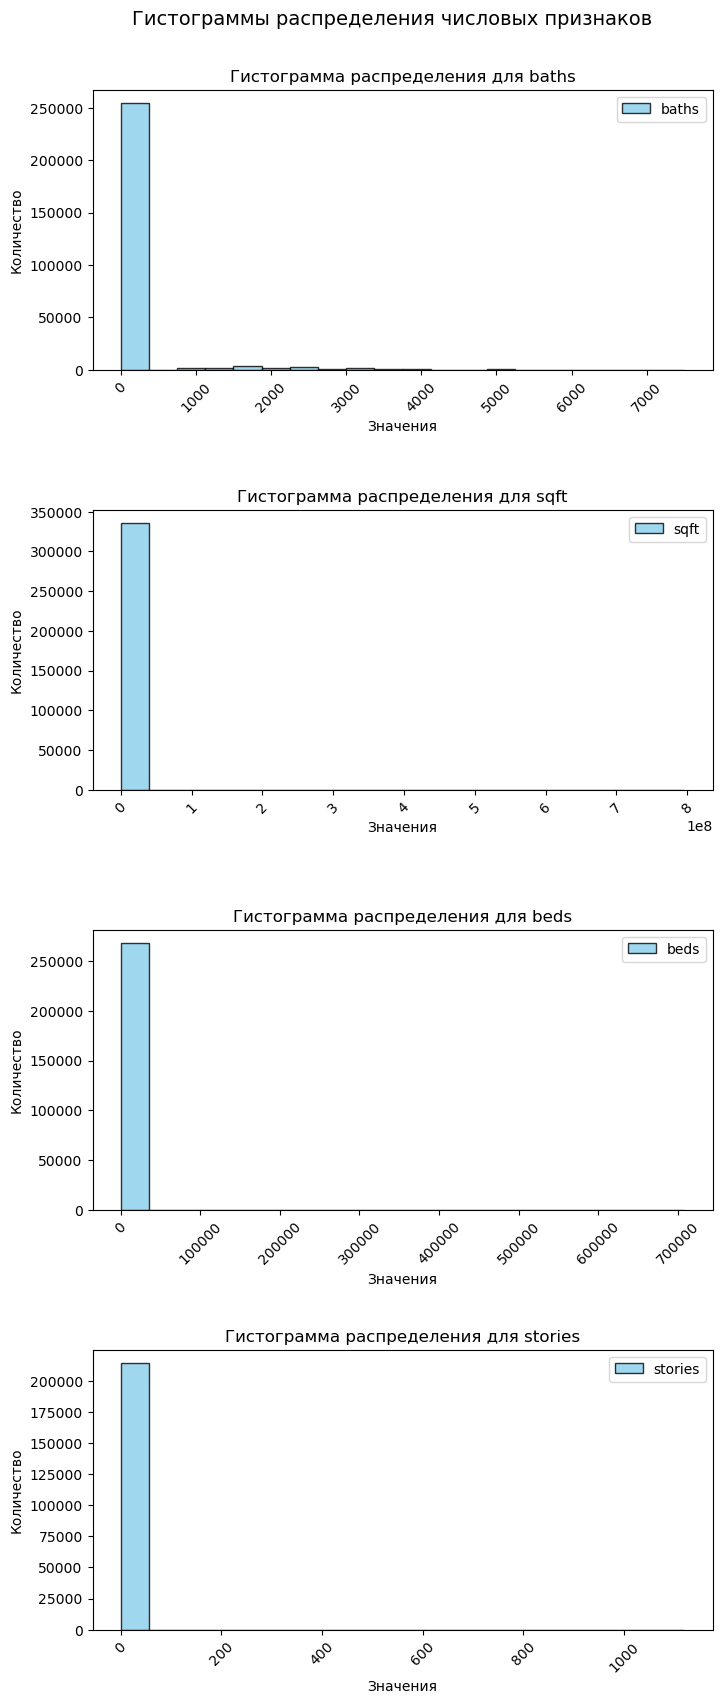

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список числовых признаков из  датасета
numeric_cols = ['baths', 'sqft', 'beds', 'stories']

#  Гистограммы распределений 
fig, ax = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 20))

for i, feature in enumerate(numeric_cols):
    data_s = df[feature].dropna()  # убираем пропущенные значения
    _, bins, _ = ax[i].hist(data_s, bins=20, alpha=0.8, label=feature, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Гистограмма распределения для {feature}', y=1.0)
    ax[i].set_ylabel('Количество')
    ax[i].set_xlabel('Значения')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend()

fig.suptitle('Гистограммы распределения числовых признаков', fontsize=14, y=0.92)
plt.subplots_adjust(hspace=0.5)
plt.show()



#### Проверка наличия выбросов и зависимостей в данных.

Статистика числовых признаков:

Feature  Min       Q1   Median      Mean       Q3         Max      IQR  Outliers
   sqft  0.0   1241.0   1800.0   6622.80   2585.0 795979430.0   1344.0     17948
  baths  0.0      2.0      2.5    117.02      3.0      7500.0      1.0     37696
   beds  0.0      3.0      3.0     39.24      4.0    708248.0      1.0     21361
stories  0.0      1.0      2.0      1.93      2.0      1120.0      1.0     10983
 target  1.0 185000.0 320000.0 649431.84 589000.0 195000000.0 404000.0     37175


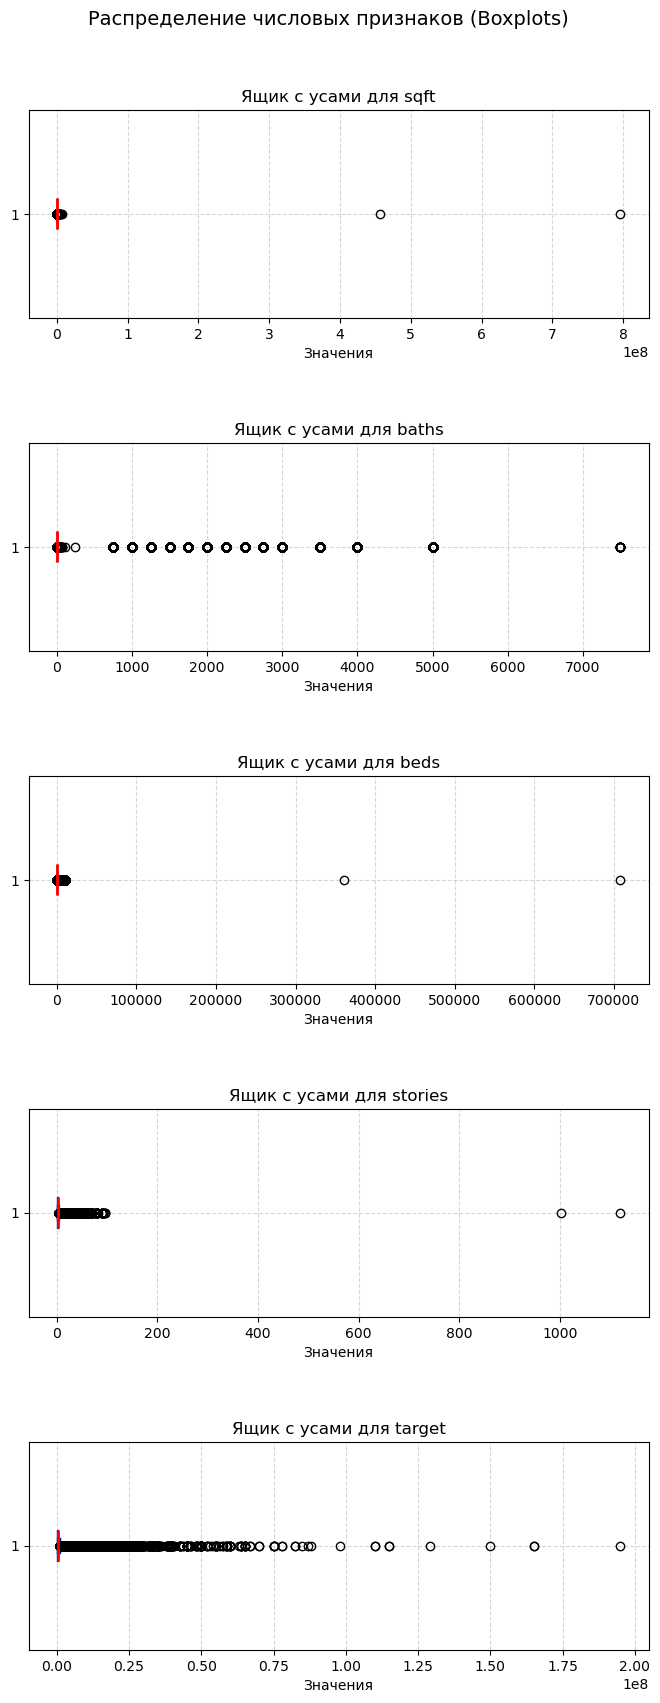

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# числовые признаки 

numeric_cols = ['sqft', 'baths', 'beds', 'stories', 'target']

# Очистка и преобразование 
for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.extract(r'(\d+\.?\d*)')[0]
        .astype(float)
    )

#Расчёт статистики для каждого признака 
stats = []
for col in numeric_cols:
    data = df[col].dropna()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()

    stats.append({
        'Feature': col,
        'Min': round(data.min(), 2),
        'Q1': round(q1, 2),
        'Median': round(data.median(), 2),
        'Mean': round(data.mean(), 2),
        'Q3': round(q3, 2),
        'Max': round(data.max(), 2),
        'IQR': round(iqr, 2),
        'Outliers': int(outliers)
    })

stats_df = pd.DataFrame(stats)
print("Статистика числовых признаков:\n")
print(stats_df.to_string(index=False))

# Построение ящиков с усами
n_features = len(numeric_cols)
fig, ax = plt.subplots(nrows=n_features, ncols=1, figsize=(8, n_features * 4))

if n_features == 1:
    ax = [ax]

for i, feature in enumerate(numeric_cols):
    data_s = df[feature].dropna()
    ax[i].boxplot(
        data_s,
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='navy'),
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='navy'),
        capprops=dict(color='navy')
    )
    ax[i].set_title(f'Ящик с усами для {feature}', fontsize=12, y=1.0)
    ax[i].set_xlabel('Значения', fontsize=10)
    ax[i].grid(True, linestyle='--', alpha=0.5)

fig.suptitle('Распределение числовых признаков (Boxplots)', fontsize=14, y=0.93)
plt.subplots_adjust(hspace=0.6)
plt.show()


In [ ]:
*Что это нам говорит:*
Минимальные значения 0 или очень маленькие для sqft, baths, beds, stories явно неверные — дома не могут иметь 0 кв. футов или 0 спален.
Максимальные значения сильно выбиваются от средних — это редкие экстремальные значения:
sqft 795 млн → явно ошибка
baths 7,500 → ошибка
beds 708 тыс → ошибка
stories 1,120 → ошибка
target 195 млн → редкий, но может быть реально дорогой дом
Средние значения сильно выше медианы (например, sqft mean 6,622 vs median 1,800) → распределение сильно скошено вправо.

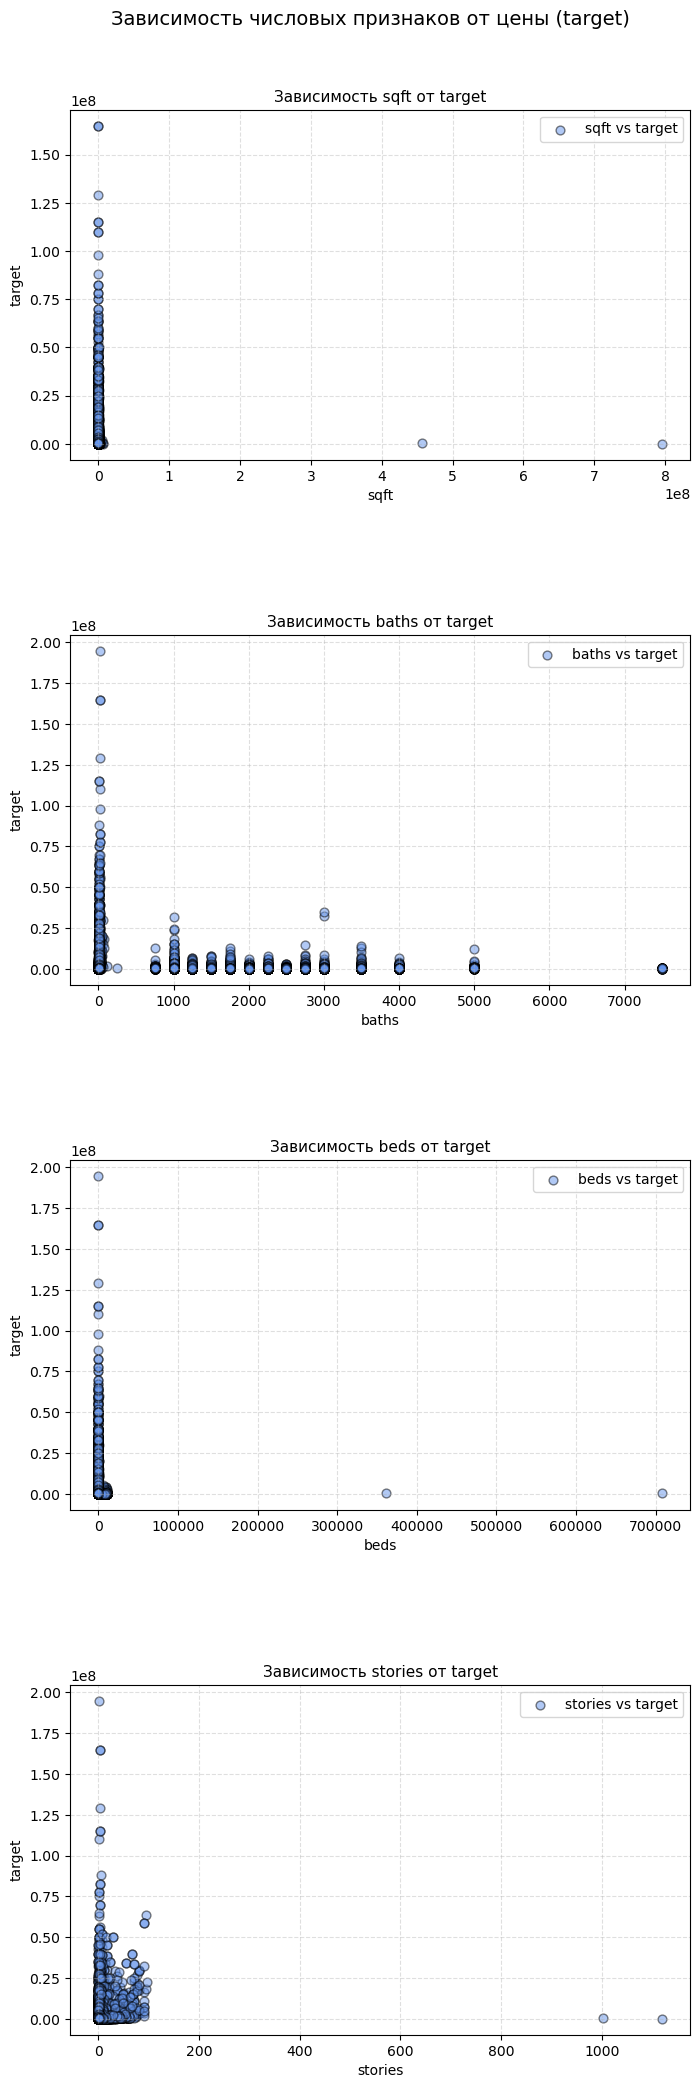

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Числовые признаки датасета 
numeric_cols = ['sqft', 'baths', 'beds', 'stories']
target_col = 'target'

# Настройка фигуры для scatter-графиков 
fig, axs = plt.subplots(nrows=len(numeric_cols), ncols=1, sharey=False, figsize=(8, 25))

for i, feature in enumerate(numeric_cols):
    ax = axs[i]
    ax.scatter(
        df[feature],
        df[target_col],
        alpha=0.5,
        color='cornflowerblue',
        edgecolors='k',
        s=40,
        label=f'{feature} vs {target_col}'
    )
    ax.set_title(f'Зависимость {feature} от {target_col}', fontsize=11, pad=6)
    ax.set_xlabel(feature)
    ax.set_ylabel(target_col)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='best')

fig.suptitle('Зависимость числовых признаков от цены (target)', fontsize=14, y=0.92)
plt.subplots_adjust(hspace=0.5)
plt.show()



Поскольку в данных много выбросов и есть наличие очень длинных хвостов - по графикам трудно определить зависимость, поэтому построим heatmap корреляций.

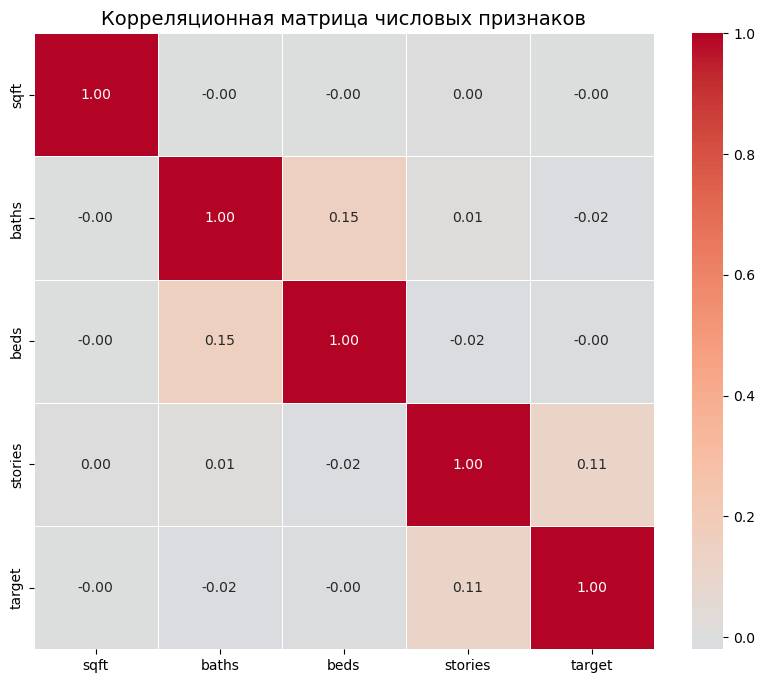

In [14]:
# проверим на мультиколлинеарность
#df = pd.read_csv('data.csv')
numeric_cols = ['sqft','baths','beds','stories','target']

missing_cols = [col for col in numeric_cols if col not in df.columns]
if missing_cols:
    print(f"В df нет этих колонок: {missing_cols}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", center=0)
plt.title('Корреляционная матрица числовых признаков', fontsize=14)
plt.show()


Как видим цена вообще не коррелирует ни с одним из признаков.

In [17]:
#import numpy as np

#num_cols = ['sqft', 'baths', 'beds', 'stories', 'target']
#df[num_cols] = df[num_cols].apply(lambda x: np.log1p(x))
#df[num_cols]

In [18]:
#Numeric columns: ['baths', 'sqft', 'beds', 'stories', 'target']
#Categorical columns: ['status', 'private pool', 'propertyType', 'street', 'homeFacts', 'fireplace', 'city', 'schools', 'zipcode', 'state', 'mls-id', 'PrivatePool', 'MlsId']

### Проверка пропущенных значений и их заполнение.¶

In [15]:
df.isnull().sum()

status           39917
private pool    372954
propertyType     34733
street               2
baths           107808
homeFacts            0
fireplace       274024
city                34
schools              0
sqft             41370
zipcode              0
beds            108835
state                0
stories         162748
mls-id          352193
PrivatePool     336825
MlsId            66869
target           10135
dtype: int64

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Числовые признаки
num_cols = ['sqft', 'baths', 'beds', 'stories', 'target']

# Заполняем target через IterativeImputer 
imputer = IterativeImputer(random_state=42, max_iter=10)
df[['target']] = imputer.fit_transform(df[['target']])

# Заполняем остальные числовые признаки медианой
for col in ['sqft', 'baths', 'beds', 'stories']:
    df[col] = df[col].fillna(df[col].median())

# Проверка
print(df[num_cols].isna().sum())


sqft       0
baths      0
beds       0
stories    0
target     0
dtype: int64


In [17]:
import numpy as np

# Ограничиваем выбросы до разумного максимума
df['beds'] = np.where(df['beds'] > 10, 10, df['beds'])
df['baths'] = np.where(df['baths'] > 10, 10, df['baths'])
df['stories'] = np.where(df['stories'] > 5, 5, df['stories'])
df['sqft'] = np.where(df['sqft'] > 10000, 10000, df['sqft'])  # пример ограничения площади

#Проверяем распределение после capping
print("beds:\n", df['beds'].value_counts().sort_index())
print("baths:\n", df['baths'].value_counts().sort_index())
print("stories:\n", df['stories'].value_counts().sort_index())
print("sqft (первые 10):\n", df['sqft'].sort_values().head(10))

#Далее можно применять масштабирование (StandardScaler / MinMaxScaler)


beds:
 beds
0.00     1452
0.25       18
0.26       32
0.27       29
0.28       39
         ... 
9.63        1
9.70        1
9.93        1
9.97        1
10.00    2465
Name: count, Length: 368, dtype: int64
baths:
 baths
0.00       3915
0.50          1
0.75          2
1.00      16507
1.10         17
1.25          8
1.50       2154
1.75         94
1.80          1
2.00     101715
2.10         53
2.20          2
2.25         17
2.50     120700
2.75         35
2.80          1
3.00      64993
3.10         12
3.20          2
3.25         11
3.30          1
3.50       5498
3.75          8
4.00      26042
4.10          3
4.25          2
4.50       1560
4.75          1
5.00       9223
5.20          1
5.25          1
5.50        522
6.00       4302
6.50        193
6.75          1
7.00       2078
7.50         65
8.00       1159
8.50         31
9.00        546
9.50          6
10.00     15652
Name: count, dtype: int64
stories:
 stories
0.00     11514
1.00     93920
1.20         1
1.30         2
1.50 

In [18]:
import numpy as np
import pandas as pd

# Логарифмирование таргета 
df['target_log'] = np.log1p(df['target'])   #логарифмируем  таргет, чтобы уменьшить скошенность

# Исходные числовые признаки + логарифм таргета
cols = ['sqft', 'beds', 'baths', 'stories', 'target_log']

# Проверка наличия колонок
for c in cols:
    if c not in df.columns:
        raise KeyError(f"Признак {c} отсутствует в DataFrame!")


#  Очистка и capping признаков

# beds, baths, stories: убираем нули, округляем и ограничиваем сверху
df = df[df['beds'] >= 1]
df = df[df['baths'] >= 1]
df = df[df['stories'] >= 1]

df['beds'] = df['beds'].round().astype(int)
df['baths'] = df['baths'].round().astype(int)
df['stories'] = df['stories'].round().astype(int)

df['beds'] = np.where(df['beds'] > 10, 10, df['beds'])
df['baths'] = np.where(df['baths'] > 10, 10, df['baths'])
df['stories'] = np.where(df['stories'] > 5, 5, df['stories'])

# sqft: убираем нули и ограничиваем сверху
df = df[df['sqft'] > 0]
df['sqft'] = np.where(df['sqft'] > 10000, 10000, df['sqft'])


# Вычисляем Z-score для каждого признака

z_scores = np.abs((df[cols] - df[cols].mean()) / df[cols].std())

# Считаем количество выбросов (Z > 3)
outliers_count = (z_scores > 3).sum()
print("Количество выбросов по признакам:\n", outliers_count)

#  Доля выбросов в %
total_rows = len(df)
outliers_percent = (outliers_count / total_rows) * 100
print("\nДоля выбросов по признакам (%):")
print(outliers_percent.round(2))


Количество выбросов по признакам:
 sqft           7594
beds           5835
baths         16123
stories        7818
target_log     5957
dtype: int64

Доля выбросов по признакам (%):
sqft          2.16
beds          1.66
baths         4.58
stories       2.22
target_log    1.69
dtype: float64


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Логарифмирование таргета 
df['target_log'] = np.log1p(df['target'])   #логарифмируем  таргет, чтобы уменьшить скошенность.

# Подготовка признаков для модели
num_cols = ['sqft', 'beds', 'baths', 'stories']   #чтобы он тоже масштабировался (особенно полезно для некоторых моделей).

# Standard Scaling (Z-score)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Проверка результатов 
print(df[num_cols].head())


       sqft      beds     baths   stories
0  0.541127  0.638963  0.614835  0.181673
1 -0.153702 -0.253523  0.076750  0.181673
2  0.614037 -0.253523 -0.461336 -1.189598
3  3.134525  1.531449  2.767178  1.552944
4 -0.260879 -0.253523 -0.461336  0.181673


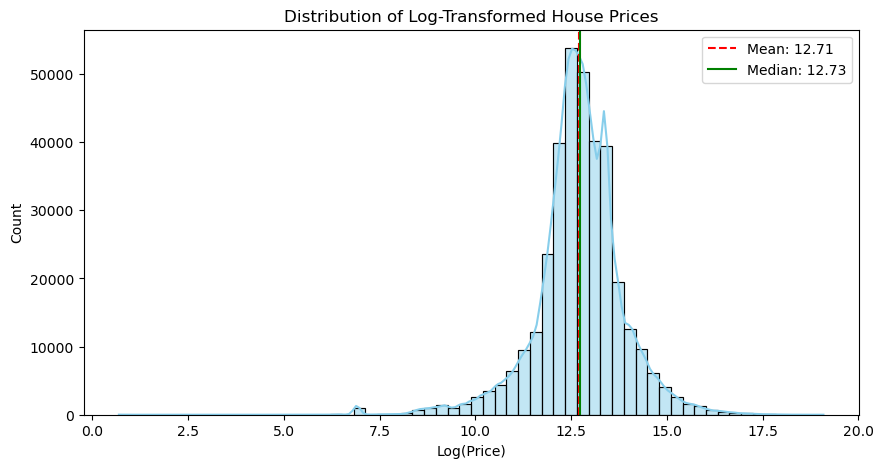

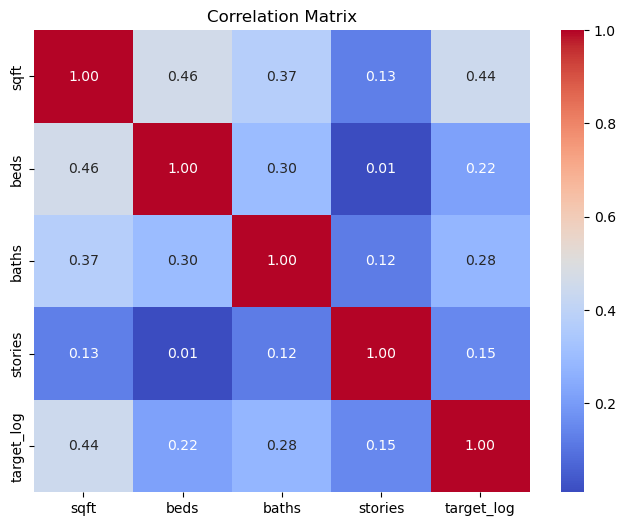

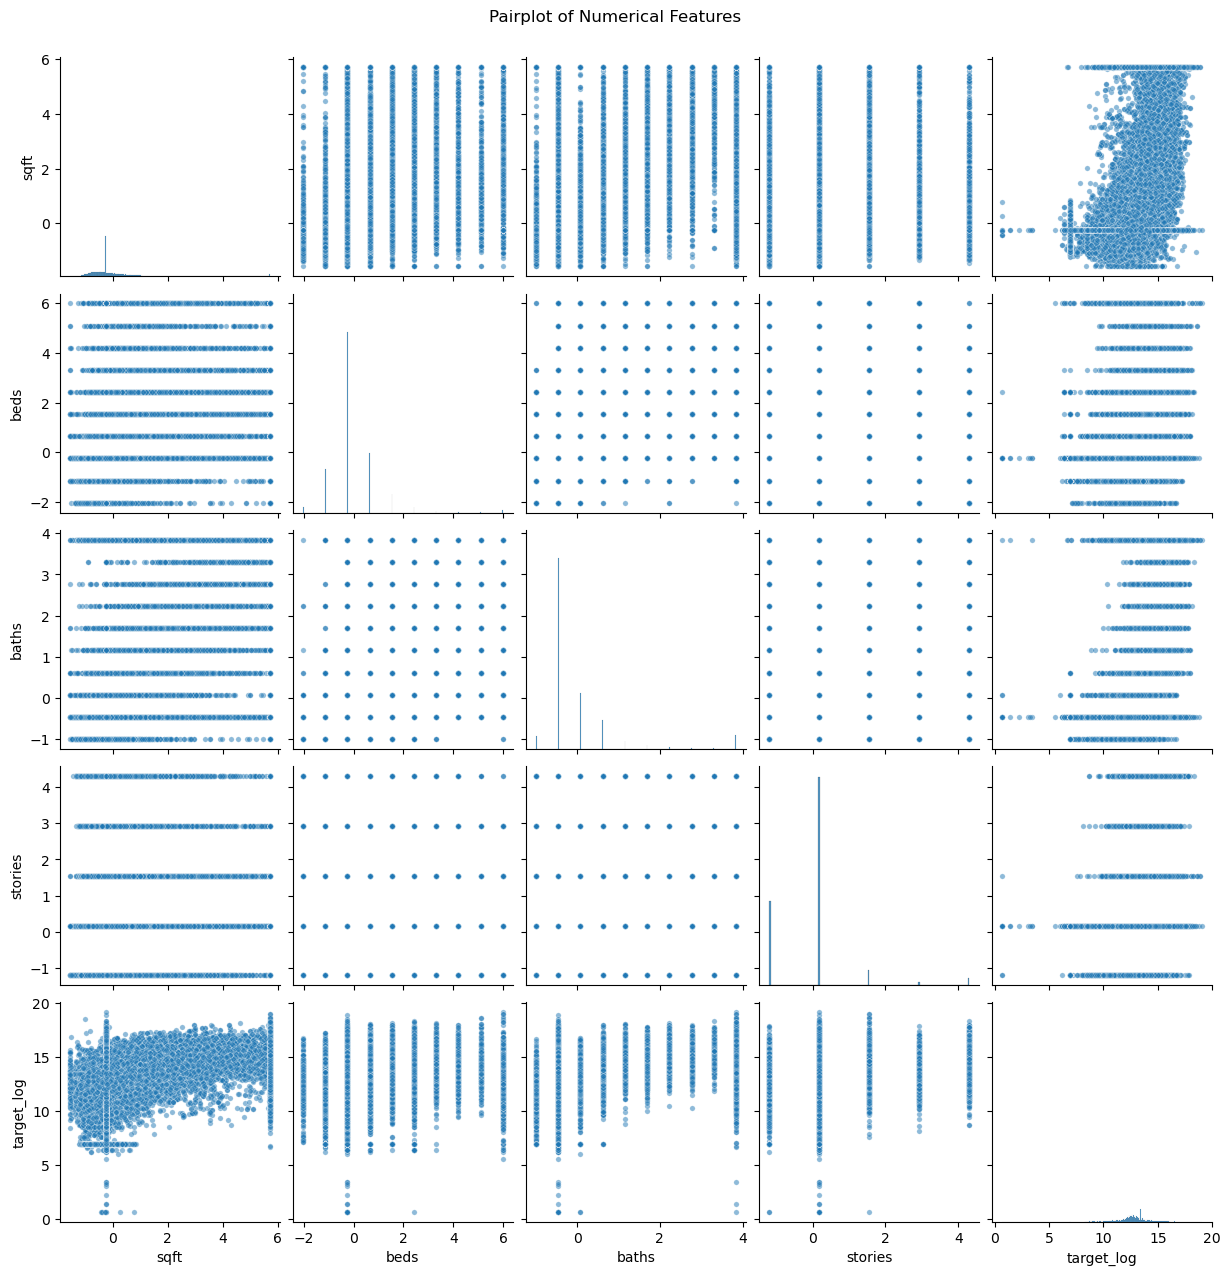

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


#  Распределение таргета (логарифм цены)

plt.figure(figsize=(10,5))
sns.histplot(df['target_log'], bins=60, kde=True, color='skyblue')
plt.axvline(df['target_log'].mean(), color='red', linestyle='--', label=f'Mean: {df["target_log"].mean():.2f}')
plt.axvline(df['target_log'].median(), color='green', linestyle='-', label=f'Median: {df["target_log"].median():.2f}')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.title('Distribution of Log-Transformed House Prices')
plt.legend()
plt.show()


# Корреляционная матрица числовых признаков + таргет

numeric_cols = ['sqft', 'beds', 'baths', 'stories', 'target_log']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Парные диаграммы (pairplot) для числовых признаков

sns.pairplot(df[numeric_cols], kind='scatter', plot_kws={'alpha':0.5, 's':15})
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [21]:
df.head(), df.shape

(     status private pool        propertyType               street     baths  \
 0    Active          NaN  Single Family Home       240 Heather Ln  0.614835   
 1  for sale          NaN  single-family home    12911 E Heroy Ave  0.076750   
 2  for sale          NaN  single-family home    2005 Westridge Rd -0.461336   
 3  for sale          NaN  single-family home  4311 Livingston Ave  2.767178   
 4  for sale          NaN            lot/land       1524 Kiscoe St -0.461336   
 
                                            homeFacts fireplace  \
 0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Gas Logs   
 1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...       NaN   
 2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...       yes   
 3  {'atAGlanceFacts': [{'factValue': '2006', 'fac...       yes   
 4  {'atAGlanceFacts': [{'factValue': '', 'factLab...       NaN   
 
              city                                            schools  \
 0  Southern Pines  [{'rating': ['4', '4'

In [ ]:
Классификация признаков

Числовые признаки, закодированные как строки (object) -> уже преобразованы в float или int:

baths → float
sqft → float
beds → int/float
stories → int/float
zipcode → int (или оставить как категорию)

Категориальные признаки (строки) -> Их можно кодировать:

status, private pool, propertyType, city, state, fireplace -> Можно применять OneHotEncoder или LabelEncoder, либо frequency encoding для LightGBM/CatBoost.
Текстовые / сложные признаки

street, homeFacts, schools -> Их либо удалить, либо обработать (например, schools → количество школ, homeFacts → наличие бассейна, камина и т.п.)
ID-поля

mls-id, MlsId — обычно удаляют, так как они уникальны и не несут полезной информации.
Целевая переменная

target мы уже подготовили

### Категориальные значения 

In [22]:
# Объединяем два столбца, берём mls-id, если он есть, иначе MlsId, иначе 'unknown'
df['mls_id_combined'] = df['mls-id'].fillna(df['MlsId']).fillna('unknown')

# Удаляем старые колонки
df.drop(['mls-id', 'MlsId'], axis=1, inplace=True)

In [23]:
#заполнение категориальных признаков (cat_cols)
# Список категориальных столбцов
cat_cols = ['status', 'propertyType', 'street', 'city']

# Заполняем пропуски значением "Unknown"
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# Выводим результат для каждого столбца
print("\nКатегориальные столбцы после заполнения пропусков")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False).head(10))



Категориальные столбцы после заполнения пропусков

status:
status
for sale                     156055
Active                        94237
For sale                      35874
Unknown                       35024
foreclosure                    6425
New construction               5055
Pending                        4130
Pre-foreclosure                2046
Pre-foreclosure / auction      1497
P                              1452
Name: count, dtype: int64

propertyType:
propertyType
single-family home               92198
Single Family                    54963
Unknown                          33877
Single Family Home               31195
condo                            25963
lot/land                         20525
Condo                            14122
townhouse                        11456
multi-family                      7900
Condo/Townhome/Row Home/Co-Op     7479
Name: count, dtype: int64

street:
street
Address Not Disclosed    672
Undisclosed Address      517
(undisclosed Address)    370


In [24]:
#Заполнение булевых столбцов (bool_cols)
# Список булевых столбцов
bool_cols = ['private pool', 'fireplace', 'PrivatePool']

# Заполняем пропуски значением False
for col in bool_cols:
    df[col] = df[col].fillna(False)

# Выводим результат для каждого булевого столбца
print("\nБулевые столбцы после заполнения пропусков")
for col in bool_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))



Булевые столбцы после заполнения пропусков

private pool:
private pool
False    348384
Yes        3459
Name: count, dtype: int64

fireplace:
fireplace
False                                253458
yes                                   50351
Yes                                   16810
1                                     14384
2                                      2402
                                      ...  
Decorative, Log Woodburning, Two          1
Gas, Three, Wood Burning, Two Way         1
Masonry, Wood Burning, Two                1
Study                                     1
Brick Fireplace, Mantle                   1
Name: count, Length: 1619, dtype: int64

PrivatePool:
PrivatePool
False    313937
yes       28791
Yes        9115
Name: count, dtype: int64


In [25]:
df.isnull().sum()

status             0
private pool       0
propertyType       0
street             0
baths              0
homeFacts          0
fireplace          0
city               0
schools            0
sqft               0
zipcode            0
beds               0
state              0
stories            0
PrivatePool        0
target             0
target_log         0
mls_id_combined    0
dtype: int64

#### Булевы признаки

In [26]:
#Булевы признаки

# Объединяем private pool и PrivatePool в один признак
df['has_private_pool'] = df[['private pool', 'PrivatePool']].any(axis=1).fillna(False)

# Приводим к типу bool
df['has_private_pool'] = df['has_private_pool'].astype(bool)

# Булевый признак для fireplace
df['has_fireplace'] = df['fireplace'].fillna(False).astype(bool)

# Удаляем исходные колонки
df.drop(columns=['private pool', 'PrivatePool', 'fireplace'], inplace=True)

# Проверка
print(df[['has_private_pool', 'has_fireplace']].head())

   has_private_pool  has_fireplace
0             False           True
1             False          False
2              True           True
3             False           True
4             False          False


In [27]:
pd.DataFrame(df.status.unique())

,0
0,Active
1,for sale
2,Unknown
3,New construction
4,New
...,...
146,Coming soon: Dec 1.
147,Pending Sh
148,Coming soon: Nov 25.
149,Under Contract Taking Back Up Offers


In [28]:

df['status'].str.lower().str.strip()
def clean_status(x):
    x = str(x).lower().strip()

    if "active" in x or "for sale" in x:
        return "active"
    elif "pending" in x or "under contract" in x:
        return "pending"
    elif "sold" in x or "closed" in x:
        return "sold"
    elif "new" in x or "construction" in x:
        return "new"
    elif "coming soon" in x:
        return "coming soon"
    else:
        return "other"

# Применяем к столбцу
df["status_clean"] = df["status"].apply(clean_status)

# Проверим результат
print(df["status_clean"].value_counts())


status_clean
active         287406
other           50389
pending          7478
new              5736
sold              743
coming soon        91
Name: count, dtype: int64


In [29]:
pd.DataFrame(df.city.unique())

,0
0,Southern Pines
1,Spokane Valley
2,Los Angeles
3,Dallas
4,Palm Bay
...,...
1935,Baldwin Hills
1936,Yarmouth Pt
1937,Bedford Hts
1938,Dimondale


In [89]:
pd.DataFrame(df.state.unique())

,0
0,NC
1,WA
2,CA
3,TX
4,FL
5,PA
6,TN
7,IA
8,NY
9,OR


In [30]:
# Очистка и унификация признаков city + state 

# Приводим к строкам и очищаем пробелы
df['city'] = df['city'].astype(str).str.strip()
df['state'] = df['state'].astype(str).str.strip()

# Приводим к нижнему регистру
df['city_clean'] = df['city'].str.lower()
df['state_clean'] = df['state'].str.lower()

# Исправляем частые дубликаты и опечатки в названиях городов
city_mapping = {
    "la": "los angeles",
    "newyork": "new york",
    "nyc": "new york",
    "dallas ": "dallas",
    "san fransisco": "san francisco",
    "st louis": "saint louis",
    "ft worth": "fort worth",
    "washinton": "washington",
    "los angles": "los angeles"
}
df['city_clean'] = df['city_clean'].replace(city_mapping)

# Удаляем строки с пустыми или 'unknown' городами
df = df[df['city_clean'].notna() & (df['city_clean'] != '') & (df['city_clean'] != 'unknown')]

# Формируем новый комбинированный признак "city_state"
df['city_state'] = df['city_clean'] + '_' + df['state_clean']

# Убираем слишком редкие города (например, < 10 объявлений)
city_counts = df['city_state'].value_counts()
rare_cities = city_counts[city_counts < 10].index
df['city_state'] = df['city_state'].apply(lambda x: 'other' if x in rare_cities else x)

# Проверим результат
print(df['city_state'].value_counts().head(20))
print(f"Всего уникальных городов: {df['city_state'].nunique()}")

city_state
houston_tx            23812
san antonio_tx        15221
miami_fl              14738
jacksonville_fl        9334
dallas_tx              8723
brooklyn_ny            7160
new york_ny            6894
chicago_il             6774
charlotte_nc           6134
orlando_fl             6010
las vegas_nv           5991
tampa_fl               5608
fort worth_tx          5504
austin_tx              5067
fort lauderdale_fl     4892
philadelphia_pa        4760
nashville_tn           4637
washington_dc          4463
los angeles_ca         3969
atlanta_ga             3963
Name: count, dtype: int64
Всего уникальных городов: 1071


In [91]:
pd.DataFrame(df.propertyType.unique())

,0
0,Single Family Home
1,single-family home
2,lot/land
3,townhouse
4,Florida
...,...
1276,"Raised Ranch, Rancher"
1277,"Townhouse, Villa"
1278,"Cabin/Lodge, Contemporary, Converted Barn, Cot..."
1279,"Lake House, Single Detached, Tudor"


In [31]:
import re

df['propertyType'].str.lower().str.strip()
def clean_property_type(x):
    if pd.isna(x):
        return 'unknown'
    
    x = str(x).lower().strip()
    
    # упрощаем составные типы
    if ',' in x:
        x = x.split(',')[0].strip()  # берём первый тип
    
    # нормализуем варианты написания
    mapping = {
        'single family home': 'single-family',
        'single-family home': 'single-family',
        'townhouse': 'townhouse',
        'condo': 'condo',
        'lot/land': 'land',
        'land': 'land',
        'apartment': 'apartment',
        'multi family': 'multi-family',
        'duplex': 'multi-family',
        'villa': 'villa',
        'mobile home': 'mobile',
        'manufactured home': 'mobile',
        'farm': 'farm',
        'cabin': 'cabin',
        'bungalow': 'bungalow',
        'ranch': 'ranch',
        'co-op': 'coop',
    }

    # ищем совпадение по ключевым словам
    for key, value in mapping.items():
        if re.search(key, x):
            return value
    
    return 'other'

# применяем к столбцу
df['propertyType_clean'] = df['propertyType'].apply(clean_property_type)

# проверяем частоты
print(df['propertyType_clean'].value_counts().head(15))


propertyType_clean
other            134307
single-family    123391
condo             48785
land              20560
townhouse         17755
multi-family       2245
ranch              2127
apartment           901
mobile              788
bungalow            608
farm                291
coop                 40
cabin                13
villa                 3
Name: count, dtype: int64


In [32]:
# Список категориальных признаков для проверки
cat_cols = ['status_clean', 'city_state', 'propertyType_clean']

# Проверяем количество пропусков
print("Пропуски до заполнения:")
print(df[cat_cols].isna().sum())

# Заполняем пропуски значением "other"
df[cat_cols] = df[cat_cols].fillna('other')

# Проверяем результат
print("\nПропуски после заполнения:")
print(df[cat_cols].isna().sum())

# Опционально: выводим топ-5 уникальных значений для проверки
for col in cat_cols:
    print(f"\n{col} (топ-5 значений):")
    print(df[col].value_counts().head())


Пропуски до заполнения:
status_clean          0
city_state            0
propertyType_clean    0
dtype: int64

Пропуски после заполнения:
status_clean          0
city_state            0
propertyType_clean    0
dtype: int64

status_clean (топ-5 значений):
status_clean
active     287382
other       50384
pending      7478
new          5736
sold          743
Name: count, dtype: int64

city_state (топ-5 значений):
city_state
houston_tx         23812
san antonio_tx     15221
miami_fl           14738
jacksonville_fl     9334
dallas_tx           8723
Name: count, dtype: int64

propertyType_clean (топ-5 значений):
propertyType_clean
other            134307
single-family    123391
condo             48785
land              20560
townhouse         17755
Name: count, dtype: int64


In [ ]:
# status_clean          0
# city_state            0
# propertyType_clean    0

In [33]:
import pandas as pd

# Пример: если исходные колонки status и propertyType
#df['status_clean'] = df['status'].str.lower().str.strip()
#df['propertyType_clean'] = df['propertyType'].str.lower().str.strip()

cat_cols = ['status_clean', 'city_state', 'propertyType_clean']

# One-Hot Encoding для признаков с небольшим числом категорий

df = pd.get_dummies(df, columns=['status_clean', 'propertyType_clean'], prefix=['status', 'propertyType'])

# Считаем частоту каждого города
city_freq = df['city_state'].value_counts(normalize=True)

# Заменяем city_state на частоту
df['city_state_freq'] = df['city_state'].map(city_freq)

#  Если нужно, можно объединить редкие города в 'other'

# редкие города (например, <10 объявлений уже учтены ранее как 'other')
# df['city_state'] = df['city_state'].apply(lambda x: 'other' if x not in city_freq.index else x)

# Проверка результата

print(df.head())
print(df[['city_state', 'city_state_freq']].head())


     status        propertyType               street     baths  \
0    Active  Single Family Home       240 Heather Ln  0.614835   
1  for sale  single-family home    12911 E Heroy Ave  0.076750   
2  for sale  single-family home    2005 Westridge Rd -0.461336   
3  for sale  single-family home  4311 Livingston Ave  2.767178   
4  for sale            lot/land       1524 Kiscoe St -0.461336   

                                           homeFacts            city  \
0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Southern Pines   
1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Spokane Valley   
2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...     Los Angeles   
3  {'atAGlanceFacts': [{'factValue': '2006', 'fac...          Dallas   
4  {'atAGlanceFacts': [{'factValue': '', 'factLab...        Palm Bay   

                                             schools      sqft zipcode  \
0  [{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...  0.541127   28387   
1  [{'rating': ['4/10'

##### Проверка наличия данных


In [ ]:
#Проверка наличия данных
#Сначала посмотрим, сколько непустых значений в этих колонках:

#print(df['homeFacts'].notna().sum())
#print(df['schools'].notna().sum())

In [34]:
#Сначала посмотрим, сколько непустых значений в этих колонках:
df['schools'].iloc[0]


'[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]'

In [35]:
import ast
import numpy as np

def parse_schools(schools_str):
    try:
        # Преобразуем строку в объект Python
        data = ast.literal_eval(schools_str)[0]

        # Рейтинги
        ratings = [int(r) for r in data['rating'] if r.isdigit()]
        avg_rating = np.mean(ratings) if ratings else np.nan
        best_rating = np.max(ratings) if ratings else np.nan

        # Дистанции 
        distances = [float(d.replace(' mi', '')) for d in data['data']['Distance'] if 'mi' in d]
        avg_distance = np.mean(distances) if distances else np.nan
        min_distance = np.min(distances) if distances else np.nan

        #  Кол-во школ
        school_count = len(data['name'])

        return pd.Series({
            'school_count': school_count,
            'avg_school_rating': avg_rating,
            'best_school_rating': best_rating,
            'avg_school_distance_mi': avg_distance,
            'min_school_distance_mi': min_distance
        })
    except Exception:
        return pd.Series({
            'school_count': np.nan,
            'avg_school_rating': np.nan,
            'best_school_rating': np.nan,
            'avg_school_distance_mi': np.nan,
            'min_school_distance_mi': np.nan
        })

# Применяем функцию
df_schools = df['schools'].apply(parse_schools)

# Объединяем с основным DataFrame
df = pd.concat([df, df_schools], axis=1)



In [36]:
# Посмотреть первые строки новых признаков
print(df[['school_count', 'avg_school_rating', 'best_school_rating',
          'avg_school_distance_mi', 'min_school_distance_mi']].head(10))

# Проверить, сколько пропусков в новых колонках
print("\nКоличество пропусков:")
print(df[['school_count', 'avg_school_rating', 'best_school_rating',
          'avg_school_distance_mi', 'min_school_distance_mi']].isna().sum())

# Проверить базовую статистику (среднее, минимум, мак#Удалить исходный столбец homeFacts после парсинга:
print("\nОсновная статистика:")
print(df[['school_count', 'avg_school_rating', 'best_school_rating',
          'avg_school_distance_mi', 'min_school_distance_mi']].describe())


   school_count  avg_school_rating  best_school_rating  \
0           8.0           5.200000                 7.0   
1           NaN                NaN                 NaN   
2           NaN                NaN                 NaN   
3           NaN                NaN                 NaN   
4           NaN                NaN                 NaN   
5           0.0                NaN                 NaN   
6           4.0           2.333333                 3.0   
7           3.0           2.666667                 4.0   
8           6.0           3.800000                 7.0   
9           3.0                NaN                 NaN   

   avg_school_distance_mi  min_school_distance_mi  
0                5.537500                     2.7  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                     NaN                     NaN  
4                     NaN                     NaN  
5                     NaN                     NaN

In [37]:
import numpy as np
import pandas as pd


# Заполняем пропуски

df['school_count'] = df['school_count'].fillna(0)  # если нет данных — считаем 0
df['avg_school_rating'] = df['avg_school_rating'].fillna(df['avg_school_rating'].median())
df['best_school_rating'] = df['best_school_rating'].fillna(df['best_school_rating'].median())
df['avg_school_distance_mi'] = df['avg_school_distance_mi'].fillna(df['avg_school_distance_mi'].median())
df['min_school_distance_mi'] = df['min_school_distance_mi'].fillna(df['min_school_distance_mi'].median())


#  Создаём комбинированные признаки

# Средний рейтинг школ рядом
df['school_rating_combined'] = df[['avg_school_rating', 'best_school_rating']].mean(axis=1)

# Плотность школ: количество школ / среднее расстояние
df['school_density_score'] = df['school_count'] / (df['avg_school_distance_mi'] + 0.1)

# Бинарный признак — есть ли школы рядом
df['has_school'] = df['school_count'].apply(lambda x: 1 if x > 0 else 0)

#Проверка результатов
school_cols = ['school_count', 'avg_school_rating', 'best_school_rating',
               'avg_school_distance_mi', 'min_school_distance_mi',
               'school_rating_combined', 'school_density_score', 'has_school']

print(df[school_cols].head(10))
print("\nКоличество пропусков после обработки:")
print(df[school_cols].isna().sum())


   school_count  avg_school_rating  best_school_rating  \
0           8.0           5.200000                 7.0   
1           0.0           5.250000                 7.0   
2           0.0           5.250000                 7.0   
3           0.0           5.250000                 7.0   
4           0.0           5.250000                 7.0   
5           0.0           5.250000                 7.0   
6           4.0           2.333333                 3.0   
7           3.0           2.666667                 4.0   
8           6.0           3.800000                 7.0   
9           3.0           5.250000                 7.0   

   avg_school_distance_mi  min_school_distance_mi  school_rating_combined  \
0                5.537500                     2.7                6.100000   
1                1.700000                     0.6                6.125000   
2                1.700000                     0.6                6.125000   
3                1.700000                     0.6    

In [38]:
#оценим корреляции с ценой (target):

school_features = ['school_rating_combined', 'school_density_score', 'has_school']
                   
corrs = df[school_features + ['target_log']].corr()['target_log'].sort_values(ascending=False)
print(corrs)

target_log                1.000000
school_rating_combined    0.185708
school_density_score      0.108528
has_school                0.053107
Name: target_log, dtype: float64


In [39]:
#Сначала посмотрим, сколько непустых значений в этих колонках:
df['homeFacts'].iloc[0]

"{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}"

In [40]:
# извлечение признаков из  homeFacts
import ast
import numpy as np
import pandas as pd

def parse_homefacts(facts_str):
    try:
        data = ast.literal_eval(facts_str)  # Преобразуем строку в Python-объект
        facts = data.get('atAGlanceFacts', [])

        # Создаем словарь {factLabel: factValue}
        parsed = {item['factLabel']: item.get('factValue', None) for item in facts}

        # Извлекаем ключевые поля
        year_built = parsed.get('Year built')
        remodeled_year = parsed.get('Remodeled year')
        heating = parsed.get('Heating')
        cooling = parsed.get('Cooling')
        parking = parsed.get('Parking')
        lotsize = parsed.get('lotsize')
        price_per_sqft = parsed.get('Price/sqft')

        # Преобразуем числовые значения
        year_built = int(year_built) if year_built and year_built.isdigit() else np.nan
        remodeled_year = int(remodeled_year) if remodeled_year and remodeled_year.isdigit() else np.nan

        # Чистим price_per_sqft (удаляем $, запятые и т.п.)
        if price_per_sqft:
            price_per_sqft = float(price_per_sqft.replace('$', '').replace(',', '').strip()) if price_per_sqft.replace('$', '').replace(',', '').strip().replace('.', '').isdigit() else np.nan
        else:
            price_per_sqft = np.nan

        return pd.Series({
            'Year_built': year_built,
            'Remodeled_year': remodeled_year,
            'Heating': heating,
            'Cooling': cooling,
            'Parking': parking,
            'lotsize': lotsize,
            'Price_per_sqft': price_per_sqft
        })
    except Exception:
        return pd.Series({
            'Year_built': np.nan,
            'Remodeled_year': np.nan,
            'Heating': np.nan,
            'Cooling': np.nan,
            'Parking': np.nan,
            'lotsize': np.nan,
            'Price_per_sqft': np.nan
        })

# Применяем к DataFrame
df_homefacts = df['homeFacts'].apply(parse_homefacts)

# Объединяем с исходным
df = pd.concat([df, df_homefacts], axis=1)

In [41]:
#  Смотрим результат 
print(df[['homeFacts', 'Year_built', 'Remodeled_year', 'Heating', 'Cooling', 'Parking', 'lotsize', 'Price_per_sqft']].head(3))

# Проверим общую статистику новых признаков
print("\nПроверка уникальных значений:")
print(df[['Heating', 'Cooling', 'Parking']].nunique())

print("\nПропуски:")
print(df[['Year_built', 'Remodeled_year', 'Price_per_sqft']].isna().sum())

                                           homeFacts  Year_built  \
0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...      2019.0   
1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...      2019.0   
2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...      1961.0   

   Remodeled_year                 Heating  Cooling          Parking  \
0             NaN  Central A/C, Heat Pump                             
1             NaN                                                     
2          1967.0              Forced Air  Central  Attached Garage   

      lotsize  Price_per_sqft  
0        None           144.0  
1   5828 sqft             NaN  
2  8,626 sqft             NaN  

Проверка уникальных значений:
Heating    1927
Cooling    1419
Parking    3230
dtype: int64

Пропуски:
Year_built         51984
Remodeled_year    208837
Price_per_sqft    243757
dtype: int64


In [ ]:
Это новые признаки, которые мы извлекли из колонки homeFacts.

Year_built — год постройки дома

Remodeled_year — год последнего ремонта

Heating — тип отопления

Cooling — тип кондиционирования

Parking — тип парковки

lotsize — размер участка

Price_per_sqft — цена за квадратный фут (можно удалить)


In [42]:
# Заполнение пропусков в числовых признаках 
# Year_built
df['Year_built'] = df.groupby('city_state')['Year_built'].transform(lambda x: x.fillna(x.median()))
df['Year_built'] = df['Year_built'].fillna(df['Year_built'].median())

# Remodeled_year
df['Remodeled_year'] = df.groupby('city_state')['Remodeled_year'].transform(lambda x: x.fillna(x.median()))
df['Remodeled_year'] = df['Remodeled_year'].fillna(df['Remodeled_year'].median())

# Проверка пропусков
print(df[['Year_built', 'Remodeled_year']].isna().sum())


Year_built        0
Remodeled_year    0
dtype: int64


In [43]:
#lotsize
import numpy as np
import re
import pandas as pd


#  Функция очистки lotsize

def clean_lotsize(x):
    if pd.isna(x):
        return np.nan
    
    x = str(x).lower().replace(',', '').strip()
    
    # Если указано в акрах, переводим в sqft
    if 'acre' in x:
        match = re.findall(r'[\d\.]+', x)
        if match:
            num = float(match[0])
            return num * 43560  # 1 acre = 43,560 sqft
    elif 'sqft' in x:
        match = re.findall(r'[\d\.]+', x)
        if match:
            return float(match[0])
    else:
        # Если просто число
        try:
            return float(x)
        except:
            return np.nan
    
    return np.nan


#  Применяем к колонке lotsize

df['lotsize_clean'] = df['lotsize'].apply(clean_lotsize)


# Заполняем пропуски медианой по city_state

df['lotsize_clean'] = df.groupby('city_state')['lotsize_clean'].transform(lambda x: x.fillna(x.median()))
df['lotsize_clean'] = df['lotsize_clean'].fillna(df['lotsize_clean'].median())


#  Проверка результата

print(df[['lotsize', 'lotsize_clean']].head(10))
print("Пропуски после очистки:", df['lotsize_clean'].isna().sum())




         lotsize  lotsize_clean
0           None        29621.0
1      5828 sqft         5828.0
2     8,626 sqft         8626.0
3     8,220 sqft         8220.0
4    10,019 sqft        10019.0
5       680 sqft          680.0
6  4,996 Sq. Ft.         7932.0
7  8,750 Sq. Ft.        11325.6
8         124582       124582.0
9     2,056 sqft         2056.0
Пропуски после очистки: 0


In [45]:
def feature_engineering_log(df, CURRENT_YEAR=2025):
   
    # Возраст дома
    df['Year_built_clean'] = df['Year_built']
    df['house_age'] = CURRENT_YEAR - df['Year_built_clean']

   
    # Сколько лет с последнего ремонта
    df['Remodeled_year_clean'] = df['Remodeled_year']  # убедимся, что колонка есть
    df['years_since_remodel'] = CURRENT_YEAR - df['Remodeled_year_clean']

   
    
    # Проверка первых строк
    print(df[[ 'house_age', 'years_since_remodel']].head())

    return df

# Вызов функции
df = feature_engineering_log(df)


   house_age  years_since_remodel
0        6.0                 35.0
1        6.0                 45.0
2       64.0                 58.0
3       19.0                 19.0
4       27.0                 20.0


In [46]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Сброс индекса
df = df.reset_index(drop=True)

# Заполняем пропуски в числовых признаках
df['lotsize_clean'] = df['lotsize_clean'].fillna(0)

# Работа с исходным Price_per_sqft
df['Price_per_sqft'] = df['Price_per_sqft'].fillna(df['Price_per_sqft'].median())

# Категориальные признаки: Heating, Cooling, Parking
cat_cols = ['Heating', 'Cooling', 'Parking']
top_n = 10  # оставляем топ-N категорий

# Словарь для хранения кодировщиков для последующего применения к тесту
encoders = {}

for col in cat_cols:
    # 3.1 Заполняем пропуски
    df[col] = df[col].fillna('unknown')
    
    # 3.2 Определяем топ-N категорий
    top_categories = df[col].value_counts().nlargest(top_n).index
    
    # 3.3 Объединяем редкие категории в 'other'
    df[col] = df[col].where(df[col].isin(top_categories), 'other')
    
    # 3.4 Применяем OrdinalEncoder с обработкой неизвестных категорий
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df[col + '_LE'] = oe.fit_transform(df[[col]])
    
    # 3.5 Сохраняем кодировщик для тестового набора
    encoders[col] = oe


# Проверка результата
df[['Heating', 'Heating_LE', 'Cooling', 'Cooling_LE', 'Parking', 'Parking_LE']].head()


,Heating,Heating_LE,Cooling,Cooling_LE,Parking,Parking_LE
0,other,10.0,,0.0,,0.0
1,,0.0,,0.0,,0.0
2,Forced Air,5.0,Central,1.0,Attached Garage,5.0
3,Forced Air,5.0,Central,1.0,Detached Garage,7.0
4,,0.0,,0.0,,0.0


In [48]:
display(df[['Year_built_clean', 'house_age', 'Remodeled_year_clean', 
            'years_since_remodel', 'lotsize_clean', 'lotsize', 'Price_per_sqft', 
            'Heating_LE', 'Cooling_LE', 'Parking_LE', 'school_rating_combined', 'school_density_score', 'has_school']].head(10))





,Year_built_clean,house_age,Remodeled_year_clean,years_since_remodel,lotsize_clean,lotsize,Price_per_sqft,Heating_LE,Cooling_LE,Parking_LE,school_rating_combined,school_density_score,has_school
0,2019.0,6.0,1990.0,35.0,29621.0,None,144.0,10.0,0.0,0.0,6.100000,1.419069,1
1,2019.0,6.0,1980.0,45.0,5828.0,5828 sqft,174.0,0.0,0.0,0.0,6.125000,0.000000,0
2,1961.0,64.0,1967.0,58.0,8626.0,"8,626 sqft",174.0,5.0,1.0,5.0,6.125000,0.000000,0
3,2006.0,19.0,2006.0,19.0,8220.0,"8,220 sqft",174.0,5.0,1.0,7.0,6.125000,0.000000,0
4,1998.0,27.0,2005.0,20.0,10019.0,"10,019 sqft",174.0,0.0,0.0,0.0,6.125000,0.000000,0
5,1920.0,105.0,2012.0,13.0,680.0,680 sqft,174.0,5.0,1.0,0.0,6.125000,0.000000,0
6,2006.0,19.0,2006.0,19.0,7932.0,"4,996 Sq. Ft.",174.0,10.0,2.0,0.0,2.666667,1.019108,1
7,1976.0,49.0,1992.0,33.0,11325.6,"8,750 Sq. Ft.",174.0,0.0,0.0,0.0,3.333333,2.500000,1
8,1970.0,55.0,1990.0,35.0,124582.0,124582,68.0,5.0,1.0,0.0,5.400000,0.930233,1
9,2019.0,6.0,1979.0,46.0,2056.0,"2,056 sqft",162.0,7.0,1.0,5.0,6.125000,2.571429,1


In [49]:
df.head()

,status,propertyType,street,baths,homeFacts,city,schools,sqft,zipcode,beds,...,lotsize,Price_per_sqft,lotsize_clean,Year_built_clean,house_age,Remodeled_year_clean,years_since_remodel,Heating_LE,Cooling_LE,Parking_LE
0,Active,Single Family Home,240 Heather Ln,0.614835,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",0.541127,28387,0.638963,...,None,144.0,29621.0,2019.0,6.0,1990.0,35.0,10.0,0.0,0.0
1,for sale,single-family home,12911 E Heroy Ave,0.076750,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",-0.153702,99216,-0.253523,...,5828 sqft,174.0,5828.0,2019.0,6.0,1980.0,45.0,0.0,0.0,0.0
2,for sale,single-family home,2005 Westridge Rd,-0.461336,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",0.614037,90049,-0.253523,...,"8,626 sqft",174.0,8626.0,1961.0,64.0,1967.0,58.0,5.0,1.0,5.0
3,for sale,single-family home,4311 Livingston Ave,2.767178,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",3.134525,75205,1.531449,...,"8,220 sqft",174.0,8220.0,2006.0,19.0,2006.0,19.0,5.0,1.0,7.0
4,for sale,lot/land,1524 Kiscoe St,-0.461336,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",-0.260879,32908,-0.253523,...,"10,019 sqft",174.0,10019.0,1998.0,27.0,2005.0,20.0,0.0,0.0,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351814 entries, 0 to 351813
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   status                      351814 non-null  object 
 1   propertyType                351814 non-null  object 
 2   street                      351814 non-null  object 
 3   baths                       351814 non-null  float64
 4   homeFacts                   351814 non-null  object 
 5   city                        351814 non-null  object 
 6   schools                     351814 non-null  object 
 7   sqft                        351814 non-null  float64
 8   zipcode                     351814 non-null  object 
 9   beds                        351814 non-null  float64
 10  state                       351814 non-null  object 
 11  stories                     351814 non-null  float64
 12  target                      351814 non-null  float64
 13  target_log    

In [51]:
print('target' in df.columns, 'target_log' in df.columns)


True True


In [52]:
print(df.dtypes)


status                   object
propertyType             object
street                   object
baths                   float64
homeFacts                object
                         ...   
Remodeled_year_clean    float64
years_since_remodel     float64
Heating_LE              float64
Cooling_LE              float64
Parking_LE              float64
Length: 64, dtype: object


In [53]:
zipcode_stats_mean = df.groupby('zipcode')['target_log'].mean().to_dict()
zipcode_stats_median = df.groupby('zipcode')['target_log'].median().to_dict()

df['zipcode_avg_price'] = df['zipcode'].map(zipcode_stats_mean)   # типичная цена в районе
df['zipcode_median_price'] = df['zipcode'].map(zipcode_stats_median)   # медианная цена в районе

 #Проверим результат
print(df[['zipcode', 'zipcode_avg_price', 'zipcode_median_price']].head(10))

  zipcode  zipcode_avg_price  zipcode_median_price
0   28387          12.889171             12.759094
1   99216          12.660568             12.608202
2   90049          15.408072             15.387743
3   75205          14.348822             14.253121
4   32908          10.268743              9.433564
5   19145          12.411163             12.433202
6   34759          11.778243             12.180755
7   38115          11.327035             11.157677
8   50401          11.846991             11.917730
9   77080          12.739949             12.712788


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#df['zipcode_LE'] = LabelEncoder().fit_transform(df['zipcode'])


In [54]:
from sklearn.preprocessing import LabelEncoder

# Кодирование zipcode
le = LabelEncoder()
df['zipcode_LE'] = le.fit_transform(df['zipcode'])

# Проверим результаты кодирования
print("Кодирование zipcode завершено.\n")

# Показать первые 5 строк
print("Первые 5 значений после кодирования:")
print(df[['zipcode', 'zipcode_LE']].head())

# Проверим количество уникальных кодов
print("\nКоличество уникальных zipcode:", df['zipcode'].nunique())
print("Количество уникальных кодов:", df['zipcode_LE'].nunique())

# Пример отображения соответствий (первые 10)
mapping = dict(zip(le.classes_[:10], le.transform(le.classes_[:10])))
print("\nПример первых 10 соответствий zipcode → код:")
for k, v in mapping.items():
    print(f"{k} → {v}")


Кодирование zipcode завершено.

Первые 5 значений после кодирования:
  zipcode  zipcode_LE
0   28387        1103
1   99216        4484
2   90049        3635
3   75205        2688
4   32908        1391

Количество уникальных zipcode: 4492
Количество уникальных кодов: 4492

Пример первых 10 соответствий zipcode → код:
-- → 0
0 → 1
00000 → 2
02108 → 3
02109 → 4
02110 → 5
02111 → 6
02113 → 7
02114 → 8
02115 → 9


In [58]:
import pandas as pd


#  Создаём копию датафрейма

df_baseline = df.copy()

# Список колонок для удаления

drop_cols = [
    'Heating', 'Cooling', 'Parking',        # заменяем на *_LE
    'lotsize',                              # заменяем на lotsize_clean
    'city_clean', 'state_clean', 'city_state',  # оставляем только freq/LE
    'street',
    'homeFacts',
    'schools',
    'status',
    'propertyType',
    'city',
    'state',
    'Year_built',
    'Remodeled_year',
    'mls_id_combined',
    'zipcode'
                    
]


# Создаём итоговый датафрейм для baseline

df_baseline = df_fe.drop(columns=drop_cols)


# Проверка результата

print(df_fe.info())
print(df_fe.head())


#  Сохраняем в CSV для дальнейшего использования
os.makedirs("data", exist_ok=True)
df_baseline.to_csv("data/Preprocessed_Data.csv", index=False)
print("Preprocessed dataset saved as 'data/Preprocessed_Data.csv'")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351814 entries, 0 to 351813
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   baths                       351814 non-null  float64
 1   sqft                        351814 non-null  float64
 2   beds                        351814 non-null  float64
 3   stories                     351814 non-null  float64
 4   target                      351814 non-null  float64
 5   target_log                  351814 non-null  float64
 6   has_private_pool            351814 non-null  bool   
 7   has_fireplace               351814 non-null  bool   
 8   status_active               351814 non-null  bool   
 9   status_coming soon          351814 non-null  bool   
 10  status_new                  351814 non-null  bool   
 11  status_other                351814 non-null  bool   
 12  status_pending              351814 non-null  bool   
 13  status_sold   

In [59]:
#Проверка сохранённого файла
import pandas as pd
import os

# Проверим, существует ли файл
file_path = "data/Preprocessed_Data.csv"

if os.path.exists(file_path):
    print("Файл найден!")
else:
    print("Файл не найден. Проверь путь или ячейку сохранения.")

# Загружаем обратно в DataFrame
df_loaded = pd.read_csv(file_path)

# Проверяем размер и первые строки
print(f"\nРазмер данных: {df_loaded.shape}")
print(df_loaded.head())

Файл найден!

Размер данных: (351814, 49)
      baths      sqft      beds   stories     target  target_log  \
0  0.614835  0.541127  0.638963  0.181673   418000.0   12.943239   
1  0.076750 -0.153702 -0.253523  0.181673   310000.0   12.644331   
2 -0.461336  0.614037 -0.253523 -1.189598  2895000.0   14.878496   
3  2.767178  3.134525  1.531449  1.552944  2395000.0   14.688894   
4 -0.461336 -0.260879 -0.253523  0.181673     5000.0    8.517393   

   has_private_pool  has_fireplace  status_active  status_coming soon  ...  \
0             False           True           True               False  ...   
1             False          False           True               False  ...   
2              True           True           True               False  ...   
3             False           True           True               False  ...   
4             False          False           True               False  ...   

   Year_built_clean  house_age  Remodeled_year_clean  years_since_remodel  \
0  

In [128]:
import pandas as pd
import numpy as np
import os

# Путь к файлу
file_path = "data/Preprocessed_Data.csv"

# Проверка существования файла
if os.path.exists(file_path):
    print("Файл найден!")
else:
    raise FileNotFoundError(f"Файл не найден по пути {file_path}")

# Загружаем CSV
df_loaded = pd.read_csv(file_path)

# Проверка размеров
if df_loaded.shape == df_baseline.shape:
    print(f"Размер совпадает: {df_loaded.shape}")
else:
    print(f"Размеры не совпадают! df_baseline: {df_baseline.shape}, df_loaded: {df_loaded.shape}")

# Проверка колонок
cols_match = df_loaded.columns.tolist() == df_baseline.columns.tolist()
print("Колонки совпадают:", cols_match)

# Проверка числовых значений
num_cols = df_baseline.select_dtypes(include=[np.number]).columns.tolist()
num_check = all(np.isclose(
    df_baseline[col].reset_index(drop=True),
    df_loaded[col].reset_index(drop=True)
).all() for col in num_cols)
print("Числовые значения совпадают:", num_check)

#  Проверка категориальных значений
cat_cols = df_baseline.select_dtypes(exclude=[np.number]).columns.tolist()
cat_check = all(
    (df_baseline[col].reset_index(drop=True) == df_loaded[col].reset_index(drop=True)).all()
    for col in cat_cols
)
print("Категориальные значения совпадают:", cat_check)

# Итоговая проверка
if all([cols_match, num_check, cat_check]):
    print("\nCSV полностью совпадает с исходным df_fe! Можно использовать для обучения моделей.")
else:
    print("\nCSV отличается от исходного df_fe. Проверь данные!")


Файл найден!
Размер совпадает: (351814, 50)
Колонки совпадают: True
Числовые значения совпадают: True
Категориальные значения совпадают: True

CSV полностью совпадает с исходным df_fe! Можно использовать для обучения моделей.


In [88]:
from sklearn.preprocessing import StandardScaler

# Список новых числовых признаков, которые нужно масштабировать
num_features = [
    'lotsize_clean',
    'house_age',
    'years_since_remodel',
    'price_per_sqft',
    'zipcode_avg_price',
    'zipcode_median_price',
    'school_rating_combined',
    'school_density_score'
]

# Создаём scaler
scaler = StandardScaler()

#  Масштабируем и заменяем в df_baseline
df_baseline[num_features] = scaler.fit_transform(df_baseline[num_features])

#  Проверка
print(df_baseline[num_features].head())




   lotsize_clean  house_age  years_since_remodel  price_per_sqft  \
0      -0.008134   0.002384            -0.076597        0.021125   
1      -0.011899   0.002384             0.074274       -0.081339   
2      -0.011468   0.002384             0.270408        0.021426   
3      -0.011530   0.002384            -0.317992        0.002578   
4      -0.011253   0.002384            -0.302905       -0.033445   

   zipcode_avg_price  zipcode_median_price  school_rating_combined  \
0           0.211435              0.053010               -0.059655   
1          -0.058891             -0.127936               -0.035383   
2           3.190116              3.205231               -0.035383   
3           1.937519              1.844615               -0.035383   
4          -2.887304             -3.934896               -0.035383   

   school_density_score  
0             -0.034621  
1             -0.623531  
2             -0.623531  
3             -0.623531  
4             -0.623531  


# Построим baseline-модель на основе  df_baseline

- Предположим, что мы хотим предсказать target_log (логарифм цены).
- Посмотрим на  вариант с RandomForestRegressor с метриками MAE и RMSE, а также визуализацией важности признаков.

RandomForest baseline metrics:
MAE: 0.1120
RMSE: 0.2224


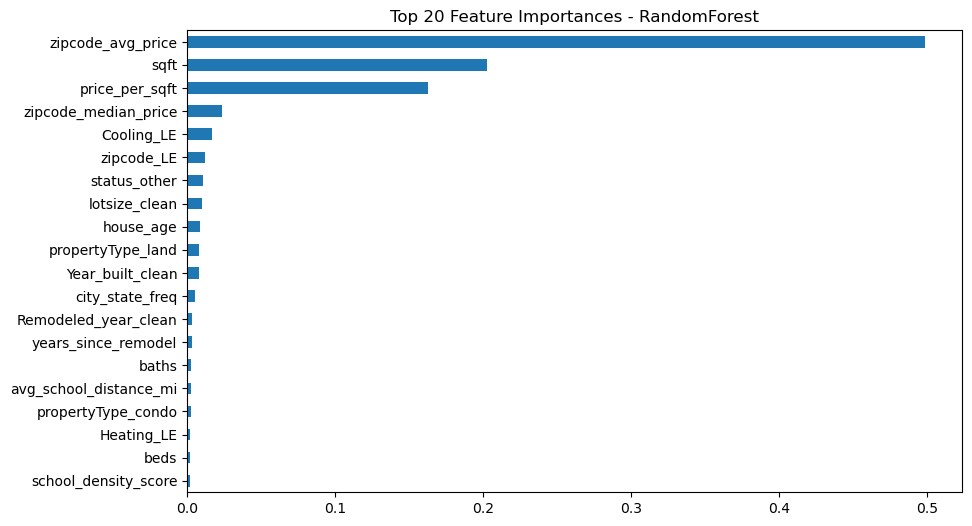

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


#  Определяем признаки и целевую переменную

X = df_baseline.drop(columns=['target', 'target_log'])  # все признаки
y = df_baseline['target_log']                           # логарифм цены

#  Разбиваем данные на train и test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#  Обучаем RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


# Делаем предсказания и оцениваем модель

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RandomForest baseline metrics:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


#import matplotlib.pyplot as plt
#import pandas as pd

# Получаем важность признаков
#feature_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
#feature_importances = feature_importances.sort_values(ascending=False)

# Строим график
#plt.figure(figsize=(10, 8))
#feature_importances.head(20).plot(kind='barh', color='skyblue')
#plt.gca().invert_yaxis()  # самые важные сверху
#plt.title('Top 20 Feature Importances - RandomForest')
#plt.xlabel('Importance')
#plt.ylabel('Features')
#plt.grid(True, axis='x')
#plt.show()




#Визуализация важности признаков

import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances - RandomForest")
plt.show()


In [83]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Переводим предсказания и целевую переменную обратно из логарифма
y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

# MAE
mae_dollars = mean_absolute_error(y_true, y_pred)

# RMSE через np.sqrt
rmse_dollars = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE в долларах: {mae_dollars:,.2f}")
print(f"RMSE в долларах: {rmse_dollars:,.2f}")



MAE в долларах: 92,549.13
RMSE в долларах: 449,893.74


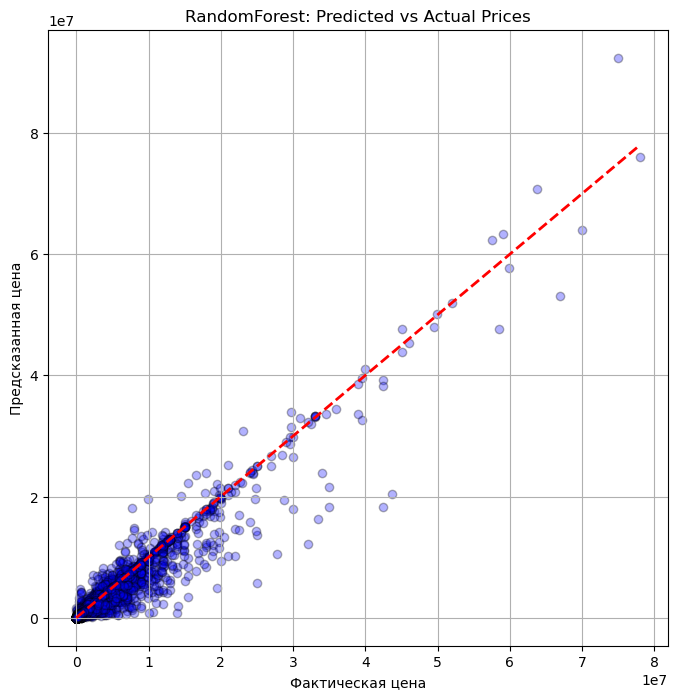

MAE в долларах: 92,549.13
RMSE в долларах: 449,893.74


In [84]:
# Посмотрим насколько модель попадает в диапазон цен.

import matplotlib.pyplot as plt
import numpy as np

# Предсказания на тестовой выборке (если у тебя логарифм)
y_pred = np.exp(y_pred_log)  # преобразуем из логарифма
y_true = np.exp(y_test)


# График предсказанных vs фактических цен

plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.3, color='blue', edgecolor='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # идеальная линия
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title('RandomForest: Predicted vs Actual Prices')
plt.grid(True)
plt.show()

#  Вычисление метрик

mae_dollars = mean_absolute_error(y_true, y_pred)
rmse_dollars = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE в долларах: {mae_dollars:,.2f}")
print(f"RMSE в долларах: {rmse_dollars:,.2f}")

Теперь метрики переведены в доллары, и их можно интерпретировать напрямую:

MAE ≈ 92,549 $ — средняя ошибка предсказания цены дома составляет около 92 тысяч долларов. Это значит, что модель в среднем «промахивается» на эту сумму.

RMSE ≈ 449,894 $ — корень из средней квадратичной ошибки, чувствителен к выбросам. Высокое значение указывает, что есть дома с экстремально высокой или низкой ценой, которые сильно влияют на метрику.

# df_baseline_st

In [91]:
from sklearn.preprocessing import StandardScaler

# 1️⃣ Создаём копию исходного baseline
df_baseline_st = df_baseline.copy()

# 2️⃣ Список числовых признаков для масштабирования
num_features = ['lotsize_clean', 'house_age', 'years_since_remodel', 
                'price_per_sqft', 'zipcode_avg_price', 'zipcode_median_price', 
                'school_rating_combined', 'school_density_score']

# 3️⃣ Применяем StandardScaler
scaler = StandardScaler()
df_baseline_st[num_features] = scaler.fit_transform(df_baseline_st[num_features])

# 4️⃣ Проверка результата
print(df_baseline_st[num_features].head())
print(df_baseline_st.info())


   lotsize_clean  house_age  years_since_remodel  price_per_sqft  \
0      -0.008134   0.002384            -0.076597        0.021125   
1      -0.011899   0.002384             0.074274       -0.081339   
2      -0.011468   0.002384             0.270408        0.021426   
3      -0.011530   0.002384            -0.317992        0.002578   
4      -0.011253   0.002384            -0.302905       -0.033445   

   zipcode_avg_price  zipcode_median_price  school_rating_combined  \
0           0.211435              0.053010               -0.059655   
1          -0.058891             -0.127936               -0.035383   
2           3.190116              3.205231               -0.035383   
3           1.937519              1.844615               -0.035383   
4          -2.887304             -3.934896               -0.035383   

   school_density_score  
0             -0.034621  
1             -0.623531  
2             -0.623531  
3             -0.623531  
4             -0.623531  
<class 'pandas

### RandomForest baseline на df_baseline_st :

Training set metrics:
MAE: 40,000.91
RMSE: 255,656.06

Testing set metrics:
MAE: 105,572.42
RMSE: 567,871.86



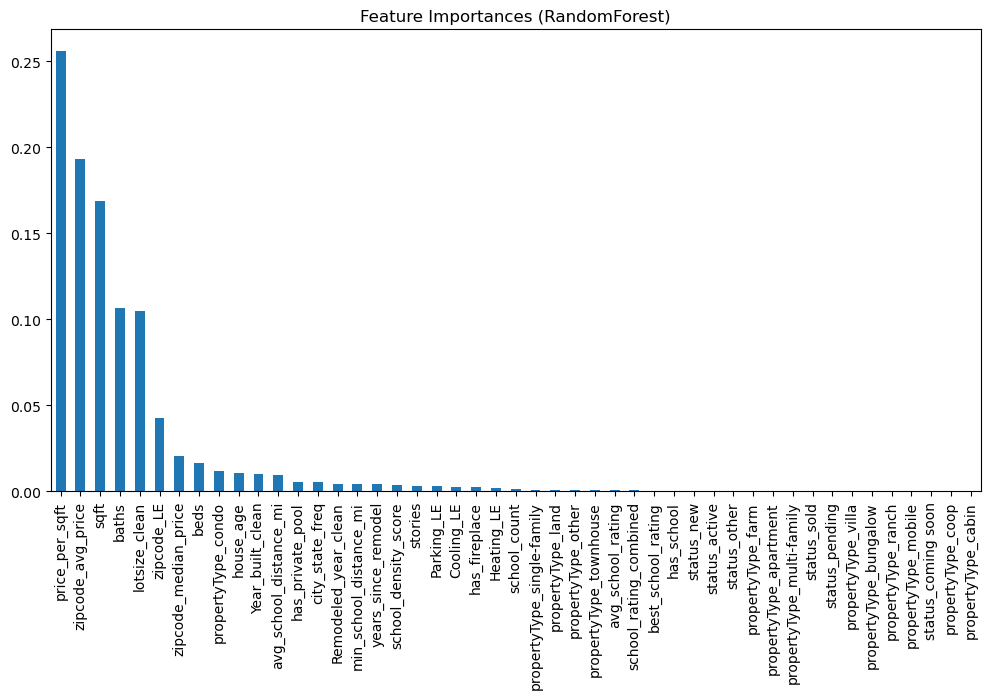

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# 1️⃣ Определяем признаки и целевую переменную
# -----------------------------
X = df_baseline_st.drop(columns=['target', 'target_log'])  # признаки
y = df_baseline_st['target_log']                               # целевая переменная (не лог)

# -----------------------------
# 2️⃣ Разделяем на train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Создаём и обучаем модель
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Делаем предсказания
# -----------------------------
y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

# -----------------------------
# 5️⃣ Считаем метрики
# -----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def print_metrics(y_true, y_pred, dataset="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # вместо squared=False
    print(f"{dataset} metrics:")
    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}\n")

# Пример вызова:
print_metrics(y_train, y_pred_train, "Training set")
print_metrics(y_test, y_pred_test, "Testing set")

# -----------------------------
# 6️⃣ Важность признаков
# -----------------------------
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importances (RandomForest)")
plt.show()
